In [1]:
import brightway2 as bw
import bw2data as bd
import lxml.builder
import networkx as nx
from lxml.builder import ElementMaker
from lxml.etree import tostring
#import pygephi


In [2]:
# Load the required project and select the desired database
bw.projects.set_current("staging")
selected_database = bw.Database("materials")

### Using the inbuilt gexf function to generate the graph of the database

In [ ]:
gexfgraph = bw.DatabaseToGEXF("biosphere3")
#gexfgraph.get_data(E=lxml.builder.ElementMaker)
gexfgraph.export()
#gexfgraph.get_data(E=ElementMaker)

### custom function to create a gexf graph from the activities and tis exchanges

In [ ]:
for activity in selected_database:
    # Get the activity data and exchanges
    print(activity['name'])
    for exchange in activity.exchanges():
    # Get the input and output activities
        #print(exchange['input'])
        print(exchange['input'])

Al 2024 kilogram process
technosphere: {'name': 'market for aluminium, primary, ingot', 'amount': 0.935, 'database': 'cutoff391', 'location': 'IAI Area, EU27 & EFTA', 'unit': 'kilogram', 'type': 'technosphere', 'reference product': 'aluminium, primary, ingot', 'input': ('cutoff391', '823822c452c6258a6ce360939935f26f'), 'output': ('materials', '31f1a80380444c41ad2b1b1cceb9d5d5')}
technosphere: {'name': 'market for copper scrap, sorted, pressed', 'amount': 0.044, 'database': 'cutoff391', 'location': 'GLO', 'unit': 'kilogram', 'type': 'technosphere', 'reference product': 'copper scrap, sorted, pressed', 'input': ('cutoff391', '4d5473bbb237606275ad372ddedf037f'), 'output': ('materials', '31f1a80380444c41ad2b1b1cceb9d5d5')}
technosphere: {'name': 'market for magnesium', 'amount': 0.015, 'database': 'cutoff391', 'location': 'GLO', 'unit': 'kilogram', 'type': 'technosphere', 'reference product': 'magnesium', 'input': ('cutoff391', '4c28de4114cc15a555d2c447878fb615'), 'output': ('materials', '

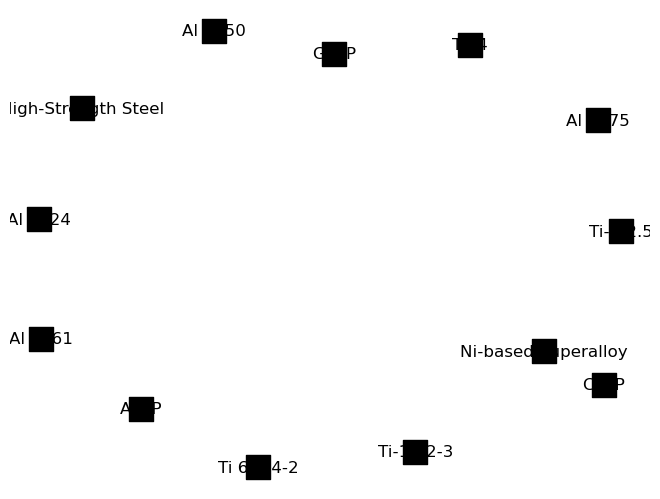

In [45]:
graph = nx.DiGraph()

for activity in selected_database:

    # Add the activity as a node to the graph
    graph.add_node(activity['name'], label=activity['name'], arrows=True, color='blue')
    print(activity['name'], activity['unit'], activity['type'])

    # Iterate over each exchange
    for exchange in activity.exchanges():
        # Get the input and output activities
        input_activity = exchange['input']

        if exchange.as_dict()['type'] =='technosphere': print('technosphere:', exchange.as_dict())

        output_activity = activity.key

        # Add edges to the graph connecting the activities
       # if exchange.as_dict()['type'] =='technosphere':
        #        graph.add_edge(activity['name'], exchange.as_dict()['name'], arrows=True, color='red')

    print('next activity')
    # Export the graph to GEXF format
    #nx.write_gexf(graph, "my_graph4.gexf")
#nx.write_graphml(graph,'test.graphml')
nx.draw(graph,  with_labels=True, node_shape='s', node_color='black', edge_color='blue')